In [1]:
## OBV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    val2 = np.random.uniform(min, max+20, 1)
    if val1 >= max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

[-1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.
 -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


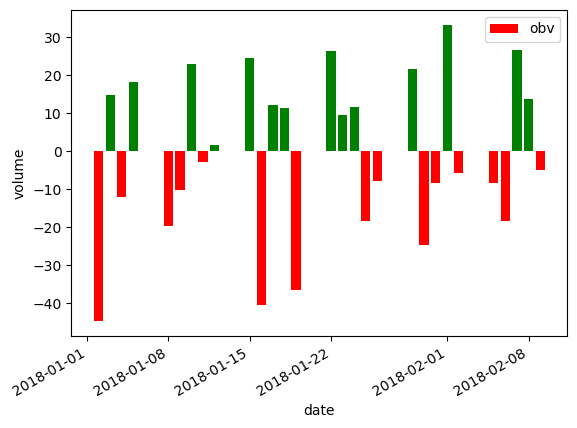

In [2]:
close = np.array(data['close'])
dates = np.array(data['date'])

volumes = np.diff(data['close'])
signs =np.sign(volumes)
colors = np.zeros_like(signs, dtype='U5')
colors[signs > 0] = 'green'
colors[signs <= 0] = 'red'
print(signs)
print(type(dates[1:]), type(volumes))

plt.figure()
plt.bar(dates[1:], volumes, color=colors, label='obv')
plt.xlabel('date')
plt.ylabel('volume')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [3]:
### 计算收益,只有正收益才显示

## 比开盘价低于0.01买入,收盘价时卖出
def profits(open_price, close_price, high_price, low_price):
    buy_price = open_price * 0.99
    if low_price <= buy_price <= high_price:
        return (close_price - buy_price) / buy_price
    return np.nan

profits_ver = np.vectorize(profits)
res = profits_ver(open, close, high, low)
res_mask = np.isnan(res)
print(res[~res_mask])

[-0.08446071  0.06768246  0.02668013 -0.05019826  0.00627732 -0.02876202
  0.01448957  0.06965708  0.01117812 -0.02594655 -0.04088996  0.02213743
  0.12179277 -0.03233394 -0.00532054  0.11427806 -0.01629448 -0.07078692
 -0.02120202 -0.03774833 -0.07013963 -0.00710731  0.0535484   0.05504981
 -0.08446071 -0.05019826  0.00627732 -0.02876202  0.01448957  0.06965708
 -0.05875308 -0.04088996  0.02213743 -0.03233394 -0.01629448 -0.07078692
 -0.03968006 -0.02120202 -0.03774833 -0.07013963 -0.00710731  0.0535484
  0.05504981  0.21110381  0.06768246  0.02668013  0.00627732  0.01448957
  0.06965708  0.06008678  0.01117812 -0.02594655  0.02213743  0.12179277
 -0.00532054  0.11427806 -0.01629448 -0.07078692  0.0535484   0.05504981
 -0.08446071 -0.05019826 -0.05875308 -0.03968006 -0.02120202  0.21110381
  0.11297517  0.06812843  0.06008678  0.21110381  0.11297517  0.06812843
  0.06008678 -0.08446071  0.00627732 -0.02876202  0.01448957  0.06965708
  0.01117812 -0.04088996  0.02213743 -0.03233394 -0.